In [88]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [89]:
# load data
data = pd.read_csv("Dollar_Rial_Price_Dataset.csv")
data.head() 

,Unnamed: 0,Date,Persian_Date,Open,Low,High,Close
0,0,11/27/2011,1390/09/06,"13,700","13,700","13,700","13,700"
1,1,11/28/2011,1390/09/07,"13,440","13,440","13,440","13,440"
2,2,11/29/2011,1390/09/08,"13,350","13,350","13,350","13,350"
3,3,11/30/2011,1390/09/09,"13,400","13,400","13,400","13,400"
4,4,12/1/2011,1390/09/10,"13,500","13,500","13,500","13,500"


In [90]:
# preprocess
data['Date_new'] = pd.to_datetime(data['Date'], yearfirst=True)  
data['Close'] = data['Close'].str.replace(',', '')
data['Date_in_Days'] = data['Date_new'].map(lambda date:f'{365*date.year + 30*date.month + date.day}') 
data['Date_in_Days'] = data['Date_in_Days'].to_numpy(dtype=int)
data.head()
# data['Date_in_Days'].dtype

,Unnamed: 0,Date,Persian_Date,Open,Low,High,Close,Date_new,Date_in_Days
0,0,11/27/2011,1390/09/06,"13,700","13,700","13,700",13700,2011-11-27,734372
1,1,11/28/2011,1390/09/07,"13,440","13,440","13,440",13440,2011-11-28,734373
2,2,11/29/2011,1390/09/08,"13,350","13,350","13,350",13350,2011-11-29,734374
3,3,11/30/2011,1390/09/09,"13,400","13,400","13,400",13400,2011-11-30,734375
4,4,12/1/2011,1390/09/10,"13,500","13,500","13,500",13500,2011-12-01,734376


In [91]:
mask = (data['Date_new'] < '2013-8-3')
data_Ahmadinejad = data.loc[mask]
data_Ahmadinejad

,Unnamed: 0,Date,Persian_Date,Open,Low,High,Close,Date_new,Date_in_Days
0,0,11/27/2011,1390/09/06,"13,700","13,700","13,700",13700,2011-11-27,734372
1,1,11/28/2011,1390/09/07,"13,440","13,440","13,440",13440,2011-11-28,734373
2,2,11/29/2011,1390/09/08,"13,350","13,350","13,350",13350,2011-11-29,734374
3,3,11/30/2011,1390/09/09,"13,400","13,400","13,400",13400,2011-11-30,734375
4,4,12/1/2011,1390/09/10,"13,500","13,500","13,500",13500,2011-12-01,734376
...,...,...,...,...,...,...,...,...,...
477,477,7/27/2013,1392/05/05,"31,500","31,500","31,700",31700,2013-07-27,734982
478,478,7/28/2013,1392/05/06,"31,900","31,700","31,900",31800,2013-07-28,734983
479,479,7/29/2013,1392/05/07,"31,700","31,600","31,750",31700,2013-07-29,734984
480,480,7/31/2013,1392/05/09,"31,750","31,650","31,750",31700,2013-07-31,734986


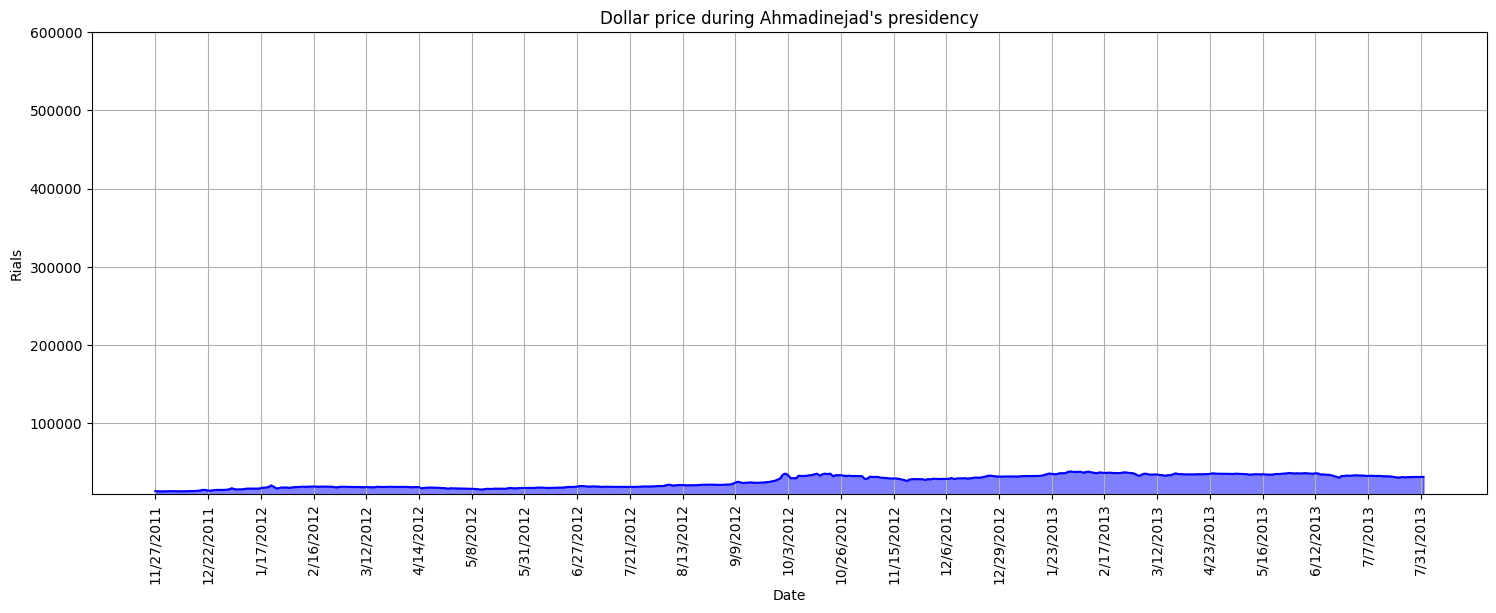

In [92]:
plt.figure(figsize=(18,6))
plt.plot(data_Ahmadinejad['Date'].to_numpy(dtype=str),
         (data_Ahmadinejad['Close'].to_numpy(dtype=int)), color="blue")

plt.fill_between(data_Ahmadinejad['Date'].to_numpy(dtype=str),
                 (data_Ahmadinejad['Close'].to_numpy(dtype=int)), color="blue", alpha=0.5)

plt.title('Dollar price during Ahmadinejad\'s presidency')
plt.xlabel('Date')
plt.ylabel('Rials')
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(data_Ahmadinejad), 20))
plt.ylim(bottom = 10000, top = 600000) 
plt.grid()
plt.show()

In [93]:
mask = (data['Date_new'] > '2013-8-2') & (data['Date_new'] <= '2021-8-3')
data_Rouhani = data.loc[mask]
data_Rouhani

,Unnamed: 0,Date,Persian_Date,Open,Low,High,Close,Date_new,Date_in_Days
482,482,8/3/2013,1392/05/12,"32,100","32,050","32,900",32850,2013-08-03,734988
483,483,8/4/2013,1392/05/13,"32,650","32,400","32,800",32400,2013-08-04,734989
484,484,8/5/2013,1392/05/14,"32,150","31,900","32,200",32000,2013-08-05,734990
485,485,8/6/2013,1392/05/15,"31,900","31,750","31,950",31900,2013-08-06,734991
486,486,8/7/2013,1392/05/16,"32,050","32,050","32,350",32250,2013-08-07,734992
...,...,...,...,...,...,...,...,...,...
2853,2853,7/28/2021,1400/05/06,"251,800","251,690","256,240",255990,2021-07-28,737903
2854,2854,7/31/2021,1400/05/09,"260,270","256,990","260,640",257290,2021-07-31,737906
2855,2855,8/1/2021,1400/05/10,"257,190","254,290","257,640",254890,2021-08-01,737906
2856,2856,8/2/2021,1400/05/11,"255,690","254,590","256,640",255190,2021-08-02,737907


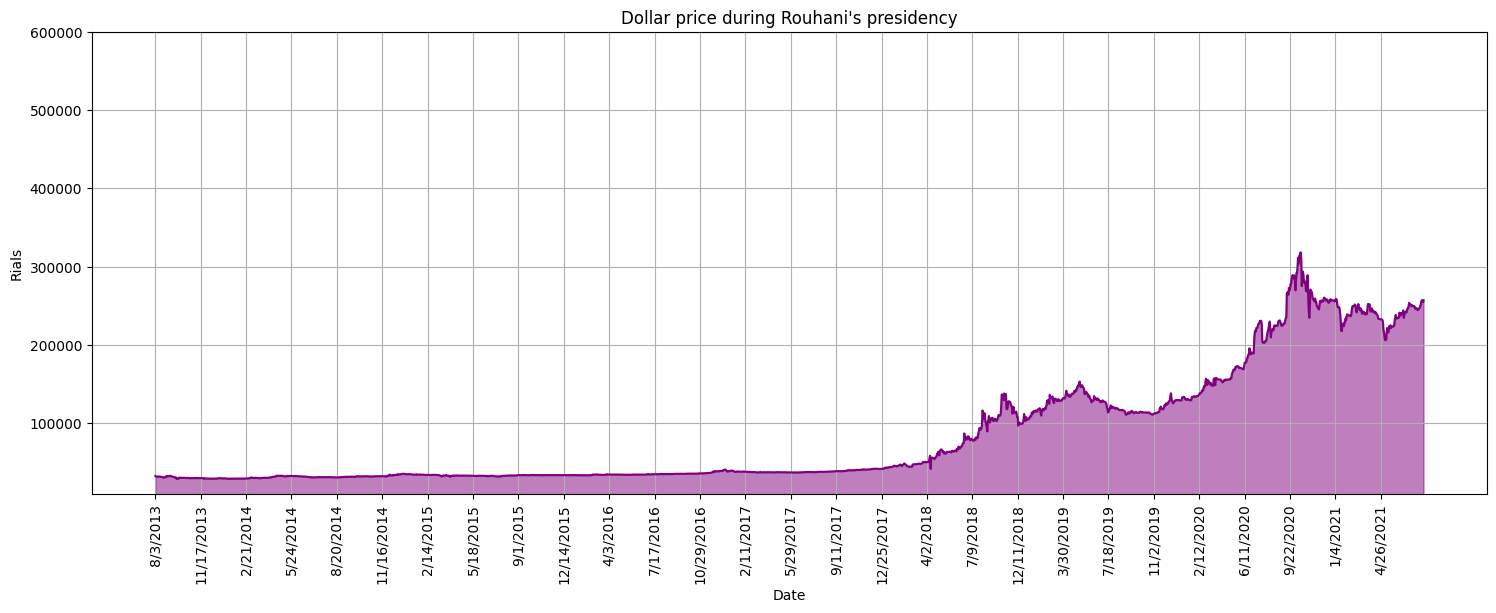

In [94]:
plt.figure(figsize=(18,6))
plt.plot(data_Rouhani['Date'].to_numpy(dtype=str), 
         (data_Rouhani['Close'].to_numpy(dtype=int)), color="purple")

plt.fill_between(data_Rouhani['Date'].to_numpy(dtype=str), 
                 (data_Rouhani['Close'].to_numpy(dtype=int)), color="purple", alpha=0.5)

plt.title('Dollar price during Rouhani\'s presidency')
plt.xlabel('Date')
plt.ylabel('Rials')
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(data_Rouhani), 85))
plt.ylim(bottom = 10000, top = 600000) 
plt.grid()
plt.show()

In [95]:
mask = (data['Date_new'] > '2021-8-3')
data_Raisi = data.loc[mask]
data_Raisi

,Unnamed: 0,Date,Persian_Date,Open,Low,High,Close,Date_new,Date_in_Days
2858,2858,8/4/2021,1400/05/13,"257,250","254,690","257,340",256190,2021-08-04,737909
2859,2859,8/5/2021,1400/05/14,"256,490","255,790","256,740",256190,2021-08-05,737910
2860,2860,8/7/2021,1400/05/16,"254,190","253,990","257,140",256380,2021-08-07,737912
2861,2861,8/8/2021,1400/05/17,"256,290","252,390","257,440",256890,2021-08-08,737913
2862,2862,8/9/2021,1400/05/18,"256,340","256,190","259,940",259090,2021-08-09,737914
...,...,...,...,...,...,...,...,...,...
3305,3305,7/1/2023,1402/04/10,"492,660","492,600","498,400",498220,2023-07-01,738606
3306,3306,7/2/2023,1402/04/11,"500,810","498,600","500,900",499340,2023-07-02,738607
3307,3307,7/3/2023,1402/04/12,"503,210","501,400","503,400",502000,2023-07-03,738608
3308,3308,7/4/2023,1402/04/13,"502,140","498,300","502,200",500750,2023-07-04,738609


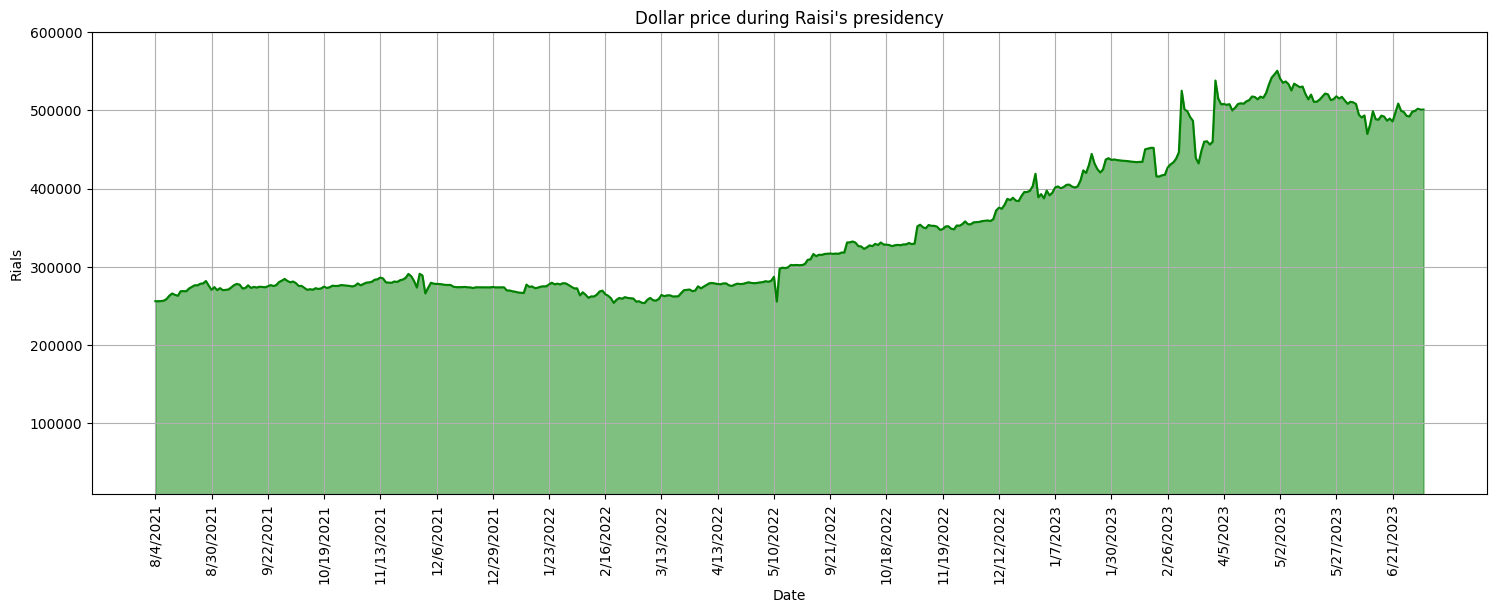

In [96]:
plt.figure(figsize=(18,6))
plt.plot(data_Raisi['Date'].to_numpy(dtype=str), 
         (data_Raisi['Close'].to_numpy(dtype=int)), color="green")

plt.fill_between(data_Raisi['Date'].to_numpy(dtype=str), 
                 (data_Raisi['Close'].to_numpy(dtype=int)), color="green", alpha=0.5)

plt.title('Dollar price during Raisi\'s presidency')
plt.xlabel('Date')
plt.ylabel('Rials')
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(data_Raisi), 20))
plt.ylim(bottom = 10000, top = 600000) 
plt.grid()
plt.show()

The highest dollar price in Ahmadinejad's, Rouhani's and Raisi's presidency:

In [97]:
Ahmadinejad_highest = data_Ahmadinejad['Close'].to_numpy(dtype=int).max()
Rouhani_highest = data_Rouhani['Close'].to_numpy(dtype=int).max()
Raisi_highest = data_Raisi['Close'].to_numpy(dtype=int).max()

In [98]:
print('Ahmadinejad: ',Ahmadinejad_highest)
print('Rouhani: ',Rouhani_highest)
print('Raisi: ',Raisi_highest)

Ahmadinejad:  38900
Rouhani:  318560
Raisi:  550510


The lowest dollar price in Ahmadinejad's, Rouhani's and Raisi's presidency:

In [99]:
Ahmadinejad_lowest = data_Ahmadinejad['Close'].to_numpy(dtype=int).min()
Rouhani_lowest = data_Rouhani['Close'].to_numpy(dtype=int).min()
Raisi_lowest = data_Raisi['Close'].to_numpy(dtype=int).min()

In [100]:
print('Ahmadinejad: ',Ahmadinejad_lowest)
print('Rouhani: ',Rouhani_lowest)
print('Raisi: ',Rouhani_lowest)

Ahmadinejad:  13350
Rouhani:  28880
Raisi:  28880


# Machine Learning

Prepare dataset:

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X1 = np.array(data_Ahmadinejad[['Date_in_Days']])
X2 = np.array(data_Rouhani[['Date_in_Days']])
X3 = np.array(data_Raisi[['Date_in_Days']])

Y1 = np.array(data_Ahmadinejad[['Close']])
Y2 = np.array(data_Rouhani[['Close']])
Y3 = np.array(data_Raisi[['Close']])

Split each dataset to train and test:

In [103]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2)
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3)

LLS (Linear Least Squares):

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
lls= LinearRegression()
lls1 = lls.fit(X1_train,Y1_train)
lls2 = lls.fit(X2_train,Y2_train)
lls3 = lls.fit(X3_train,Y3_train)

In [106]:
Y1_pred = lls.predict(X1_test)
Y2_pred = lls.predict(X2_test)
Y3_pred = lls.predict(X3_test)

In [107]:
import sklearn.metrics as metrics

# loss
mae1 = metrics.mean_absolute_error(Y1_pred, Y1_test)
mae2 = metrics.mean_absolute_error(Y2_pred, Y2_test)
mae3 = metrics.mean_absolute_error(Y3_pred, Y3_test)

print(f"Ahmadinejad (MAE): {mae1}")
print(f"Rouhani (MAE): {mae2}")
print(f"Raisi (MAE): {mae3}")


Ahmadinejad (MAE): 1036526.9689600896
Rouhani (MAE): 456281.7887905262
Raisi (MAE): 32709.773240429637
